<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import" data-toc-modified-id="Import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import</a></span></li><li><span><a href="#Data-check" data-toc-modified-id="Data-check-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data check</a></span><ul class="toc-item"><li><span><a href="#A-symetrical-dataframe-concerning-main-features-(1-to-27)" data-toc-modified-id="A-symetrical-dataframe-concerning-main-features-(1-to-27)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>A symetrical dataframe concerning main features (1 to 27)</a></span></li><li><span><a href="#NB1-:-4-features-with-huge-majority-of-zero" data-toc-modified-id="NB1-:-4-features-with-huge-majority-of-zero-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>NB1 : 4 features with huge majority of zero</a></span></li></ul></li></ul></div>

# <center> DataChallenge Télécom : Data Mining

In this notebook, I'll explain my approach to solve the problem raised by the datachallenge.

I'll widely explain the phasis of data mining that it is essential to define the algorithms to used and their hyper-parameters. 

I'll just give used algorithms and the associated score and best model parameters. </br>

I'll finish by some recommendations.

## Import

In [1]:
#computing
import numpy as np
import pandas as pd

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
from bokeh.io import output_notebook
from bokeh.io import show
from bokeh.plotting import figure
from bokeh.layouts import row
from bokeh.layouts import gridplot

#ML
from sklearn import preprocessing

In [2]:
sns.set()
output_notebook()

Loading BokehJS ...

In [3]:
path = "01_data/"
xtrain_challenge = 'xtrain_challenge.csv'
ytrain_challenge = 'ytrain_challenge.csv'
xtest_csv = 'xtest_challenge.csv'

In [4]:
# to DataFrame
nsamples = 1000
X_train = pd.read_csv(path+xtrain_challenge, nrows = nsamples)
y_train = pd.read_csv(path+ytrain_challenge, nrows = nsamples)
X_test = pd.read_csv(path+xtest_csv, nrows = nsamples)

## Data check

In [6]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test = pd.DataFrame(X_test)
X_train.shape, y_train.shape, X_test.shape

((1000, 37), (1000, 1), (1000, 37))

Let's begin regarding separately features' behavior comparing the two first part of dataset

### A symetrical dataframe concerning main features (1 to 27)

In [7]:
X_train.iloc[:,:13].describe()

,qs1,qs2,qs3,qs4,qs5,qs6,qs7,qs8,qs9,qs10,qs11,qs12,qs13
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.991970,0.00650,0.001500,-0.343590,-6.148850,-0.626240,1.221020,1.015380,0.854920,254.091070,37.213360,0.185920,0.684550
std,0.058255,0.05508,0.018738,10.189854,8.552172,4.554149,1.060649,0.905596,0.776619,74.348655,13.181683,0.387768,0.457261
min,0.170000,0.00000,0.000000,-45.440000,-31.690000,-18.080000,0.000000,0.000000,0.000000,-124.190000,18.950000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,-3.142500,-12.652500,-2.525000,0.430000,0.370000,0.290000,207.295000,25.307500,0.000000,0.000000
50%,1.000000,0.00000,0.000000,0.100000,-5.945000,-0.425000,0.940000,0.770000,0.660000,260.370000,34.390000,0.000000,1.000000
75%,1.000000,0.00000,0.000000,3.025000,0.380000,1.702500,1.682500,1.410000,1.192500,307.307500,47.662500,0.000000,1.000000
max,1.000000,0.83000,0.380000,44.020000,16.690000,17.690000,6.850000,6.300000,4.730000,434.250000,73.400000,1.000000,1.000000


In [6]:
#test for pairplot
tmp1 = pd.concat([X_train.iloc[:,:7], y_train], axis=1)
tmp2 = pd.concat([X_train.iloc[:,7:13], y_train], axis=1)
tmp3 = pd.concat([X_train.iloc[:,26:], y_train], axis=1)
tmp1.shape, tmp2.shape          

((1000, 8), (1000, 7))

In [7]:
X_train_scaled = preprocessing.scale(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled)

/home/mde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


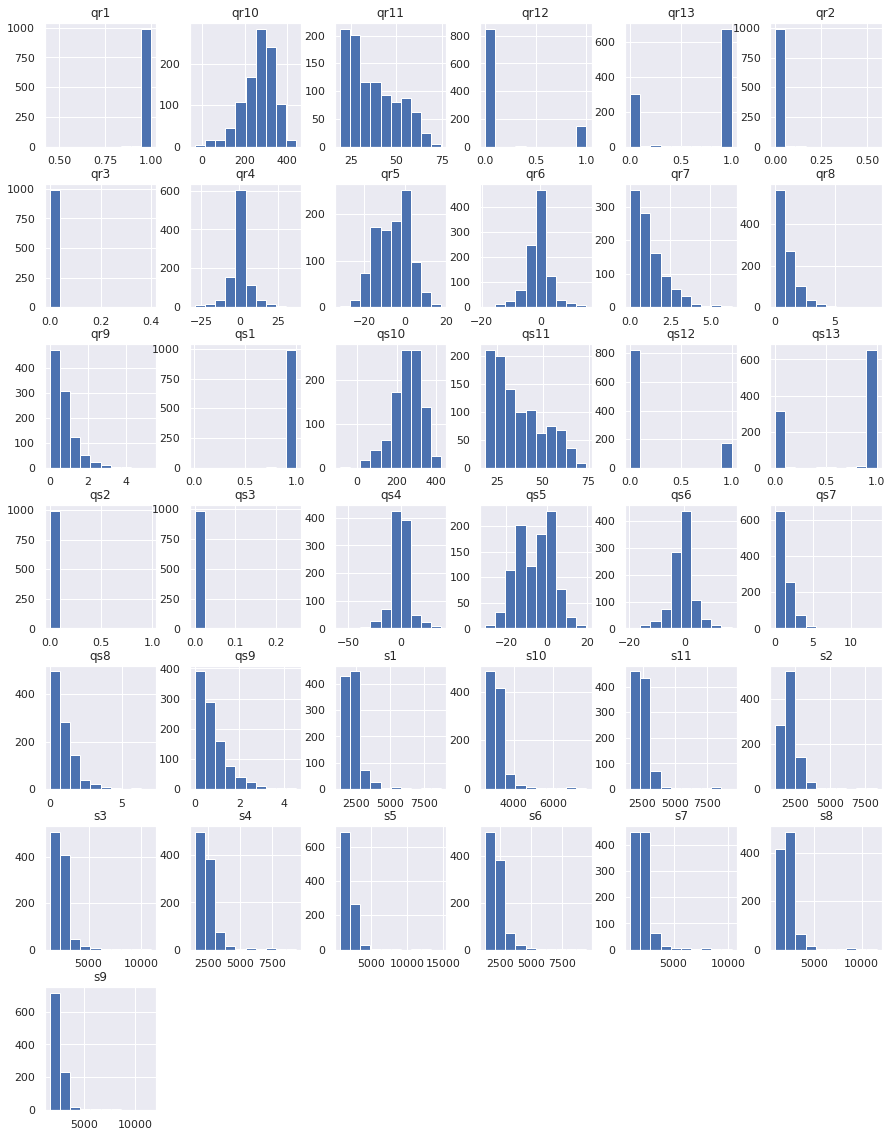

In [8]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_test.hist(ax = ax)
plt.show()

First, we will scale our data for computing performance.

/home/mde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


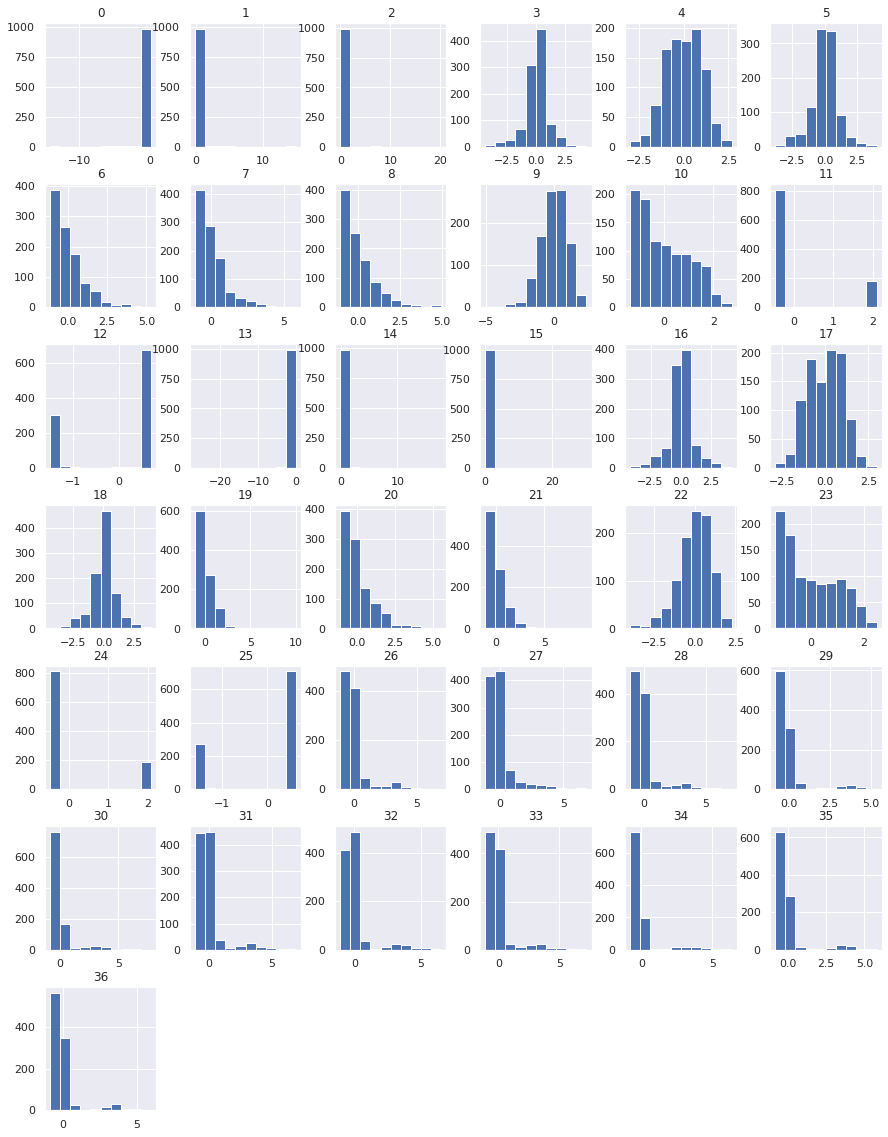

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_train_scaled.hist(ax = ax)
plt.show()

Now our data are scaled, I propose to transform some features to obtain distribution more gaussian and limit noise impact.

/home/mde/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


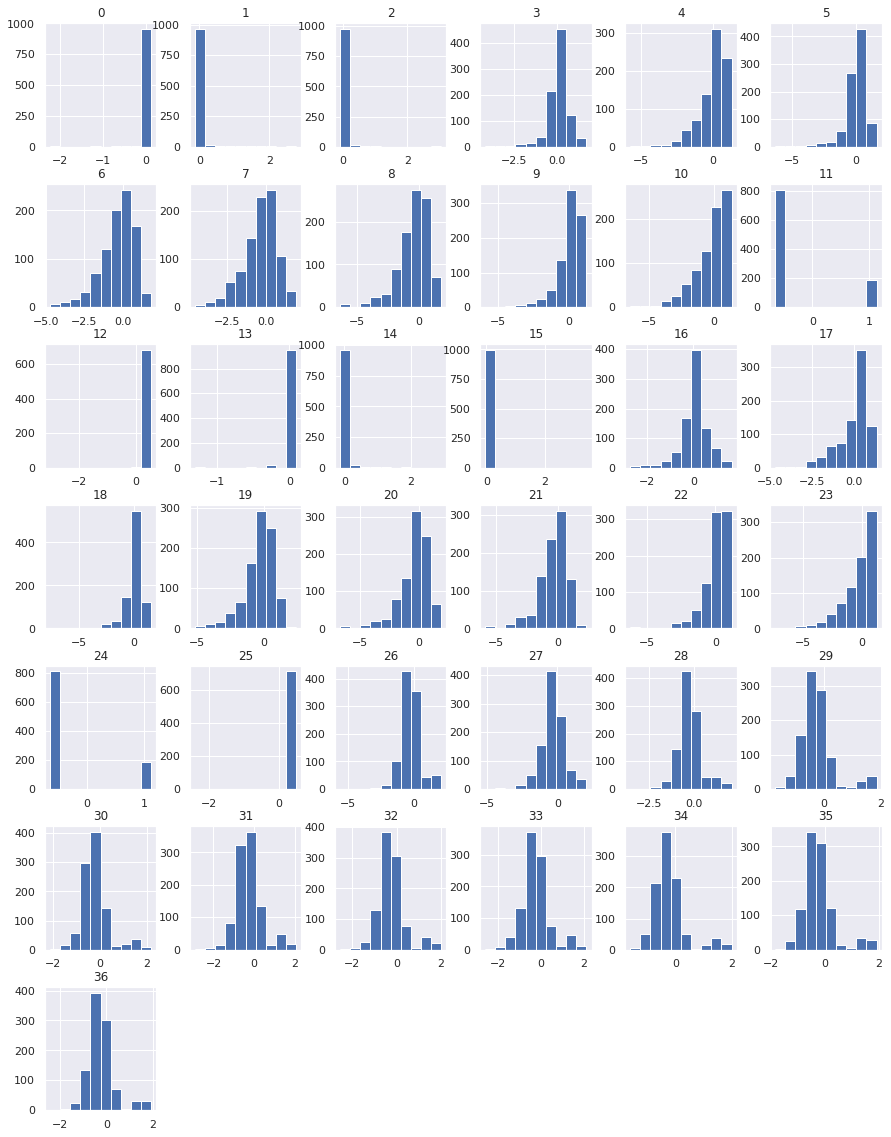

In [12]:
X_train_log = (X_train_scaled + 1).transform(np.log)
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
X_train_log.hist(ax = ax)
plt.show()

This transformation will be define as a function in our other notebook. </br>
Now, we will just plot the correlation matrix of the first 13th features beacause we have observed the first 13th features have the same distribution of the following 13th.

/home/mde/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mde/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/home/mde/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mde/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


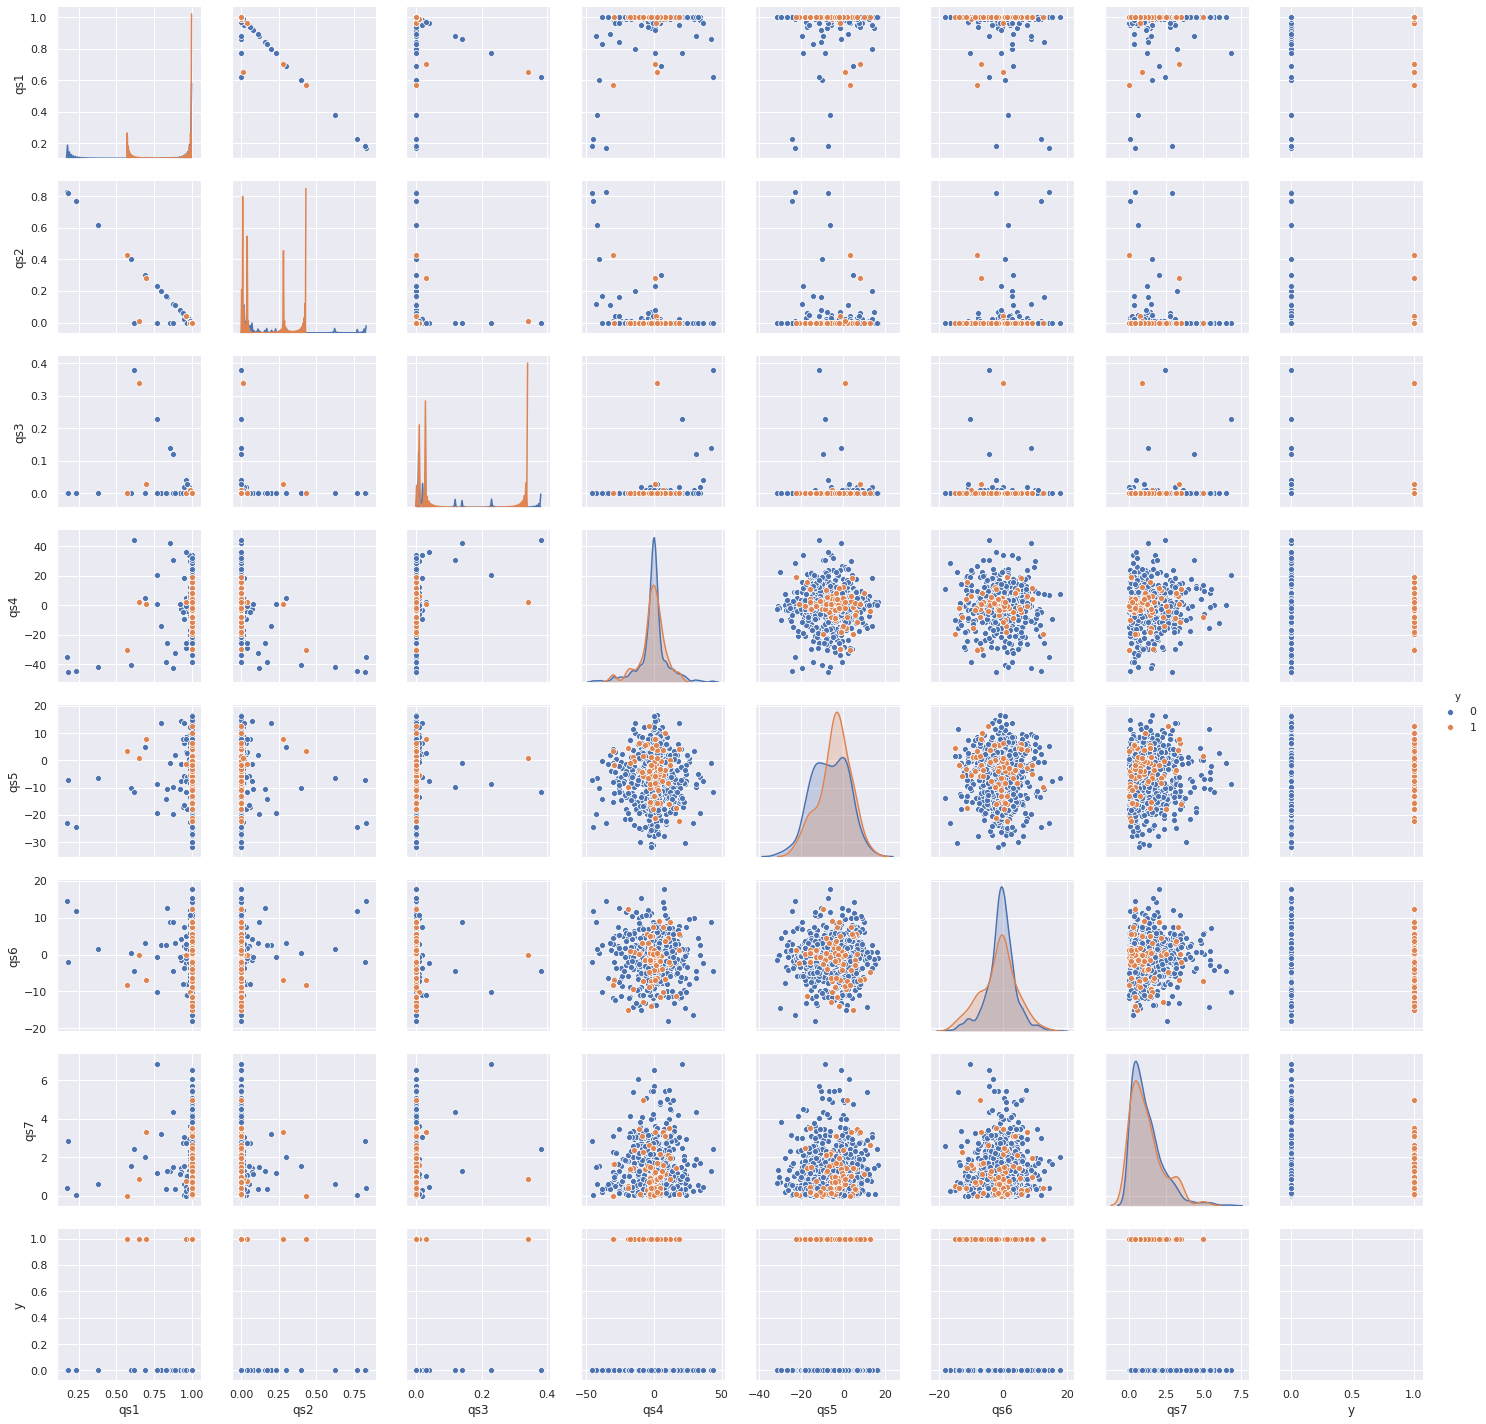

In [13]:
sns.pairplot(tmp1, hue='y')

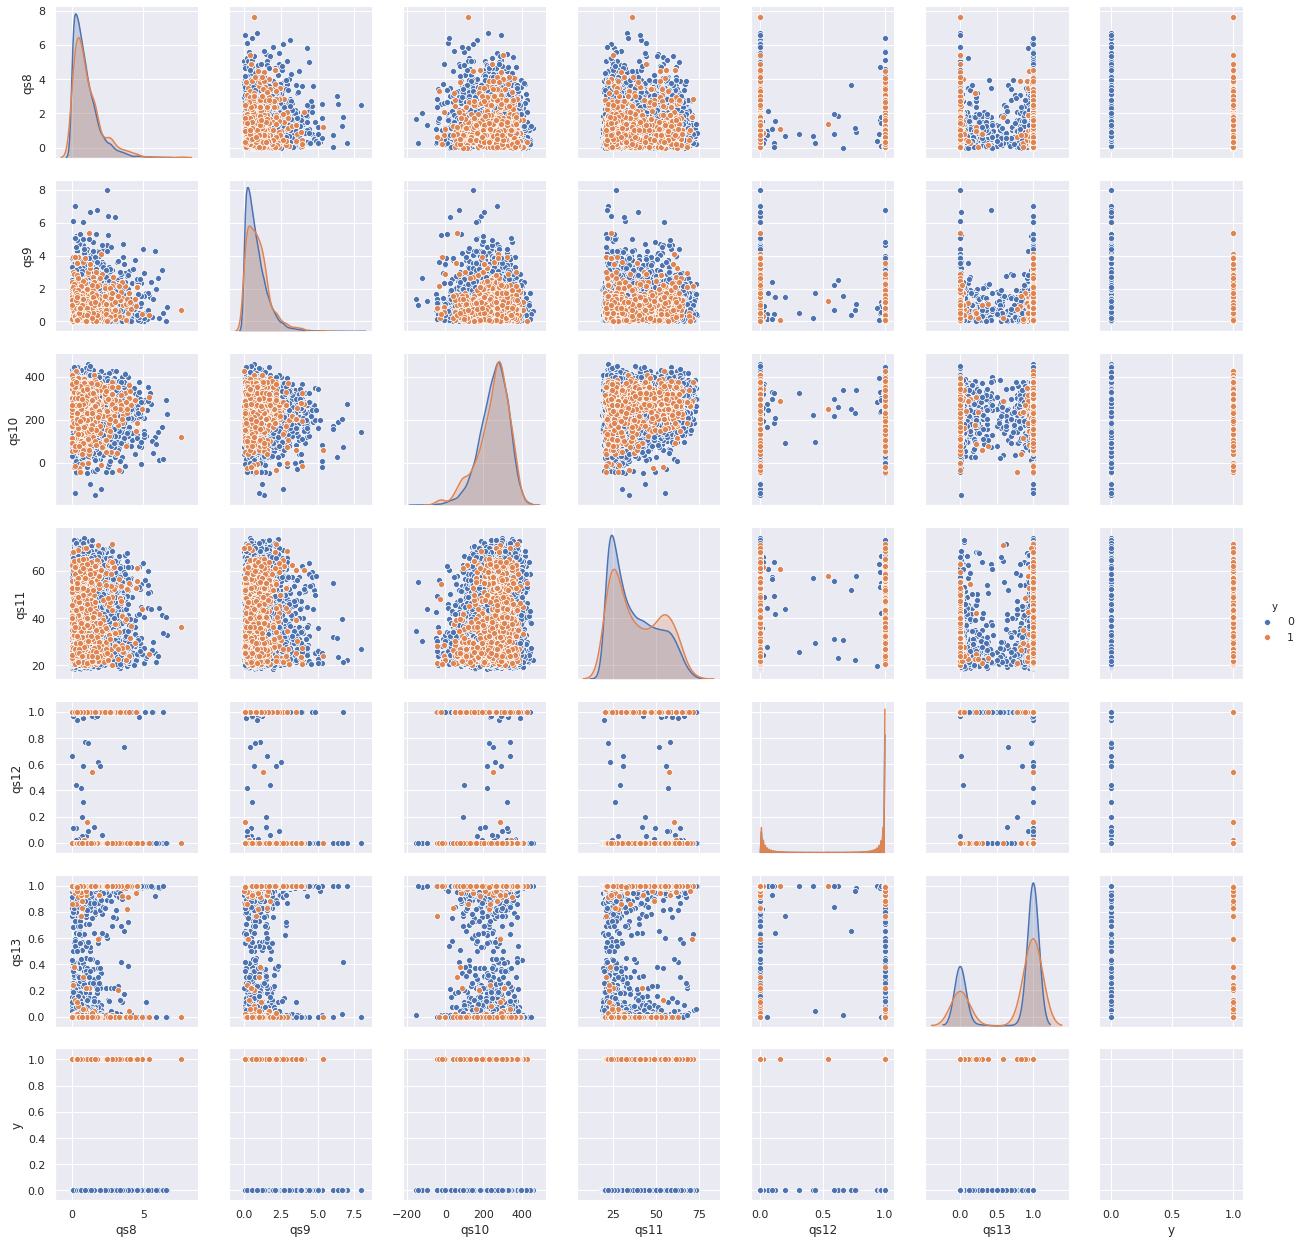

In [274]:
sns.pairplot(tmp2, hue='y')

We can see that our data are singular distributions. Indeed, we can see that some distributions have 2 main values but these values are non determinant for the classification choice. We can add that our data are not linearly separable. <br>
Now, we will focus on data score.

/home/mde/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/mde/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


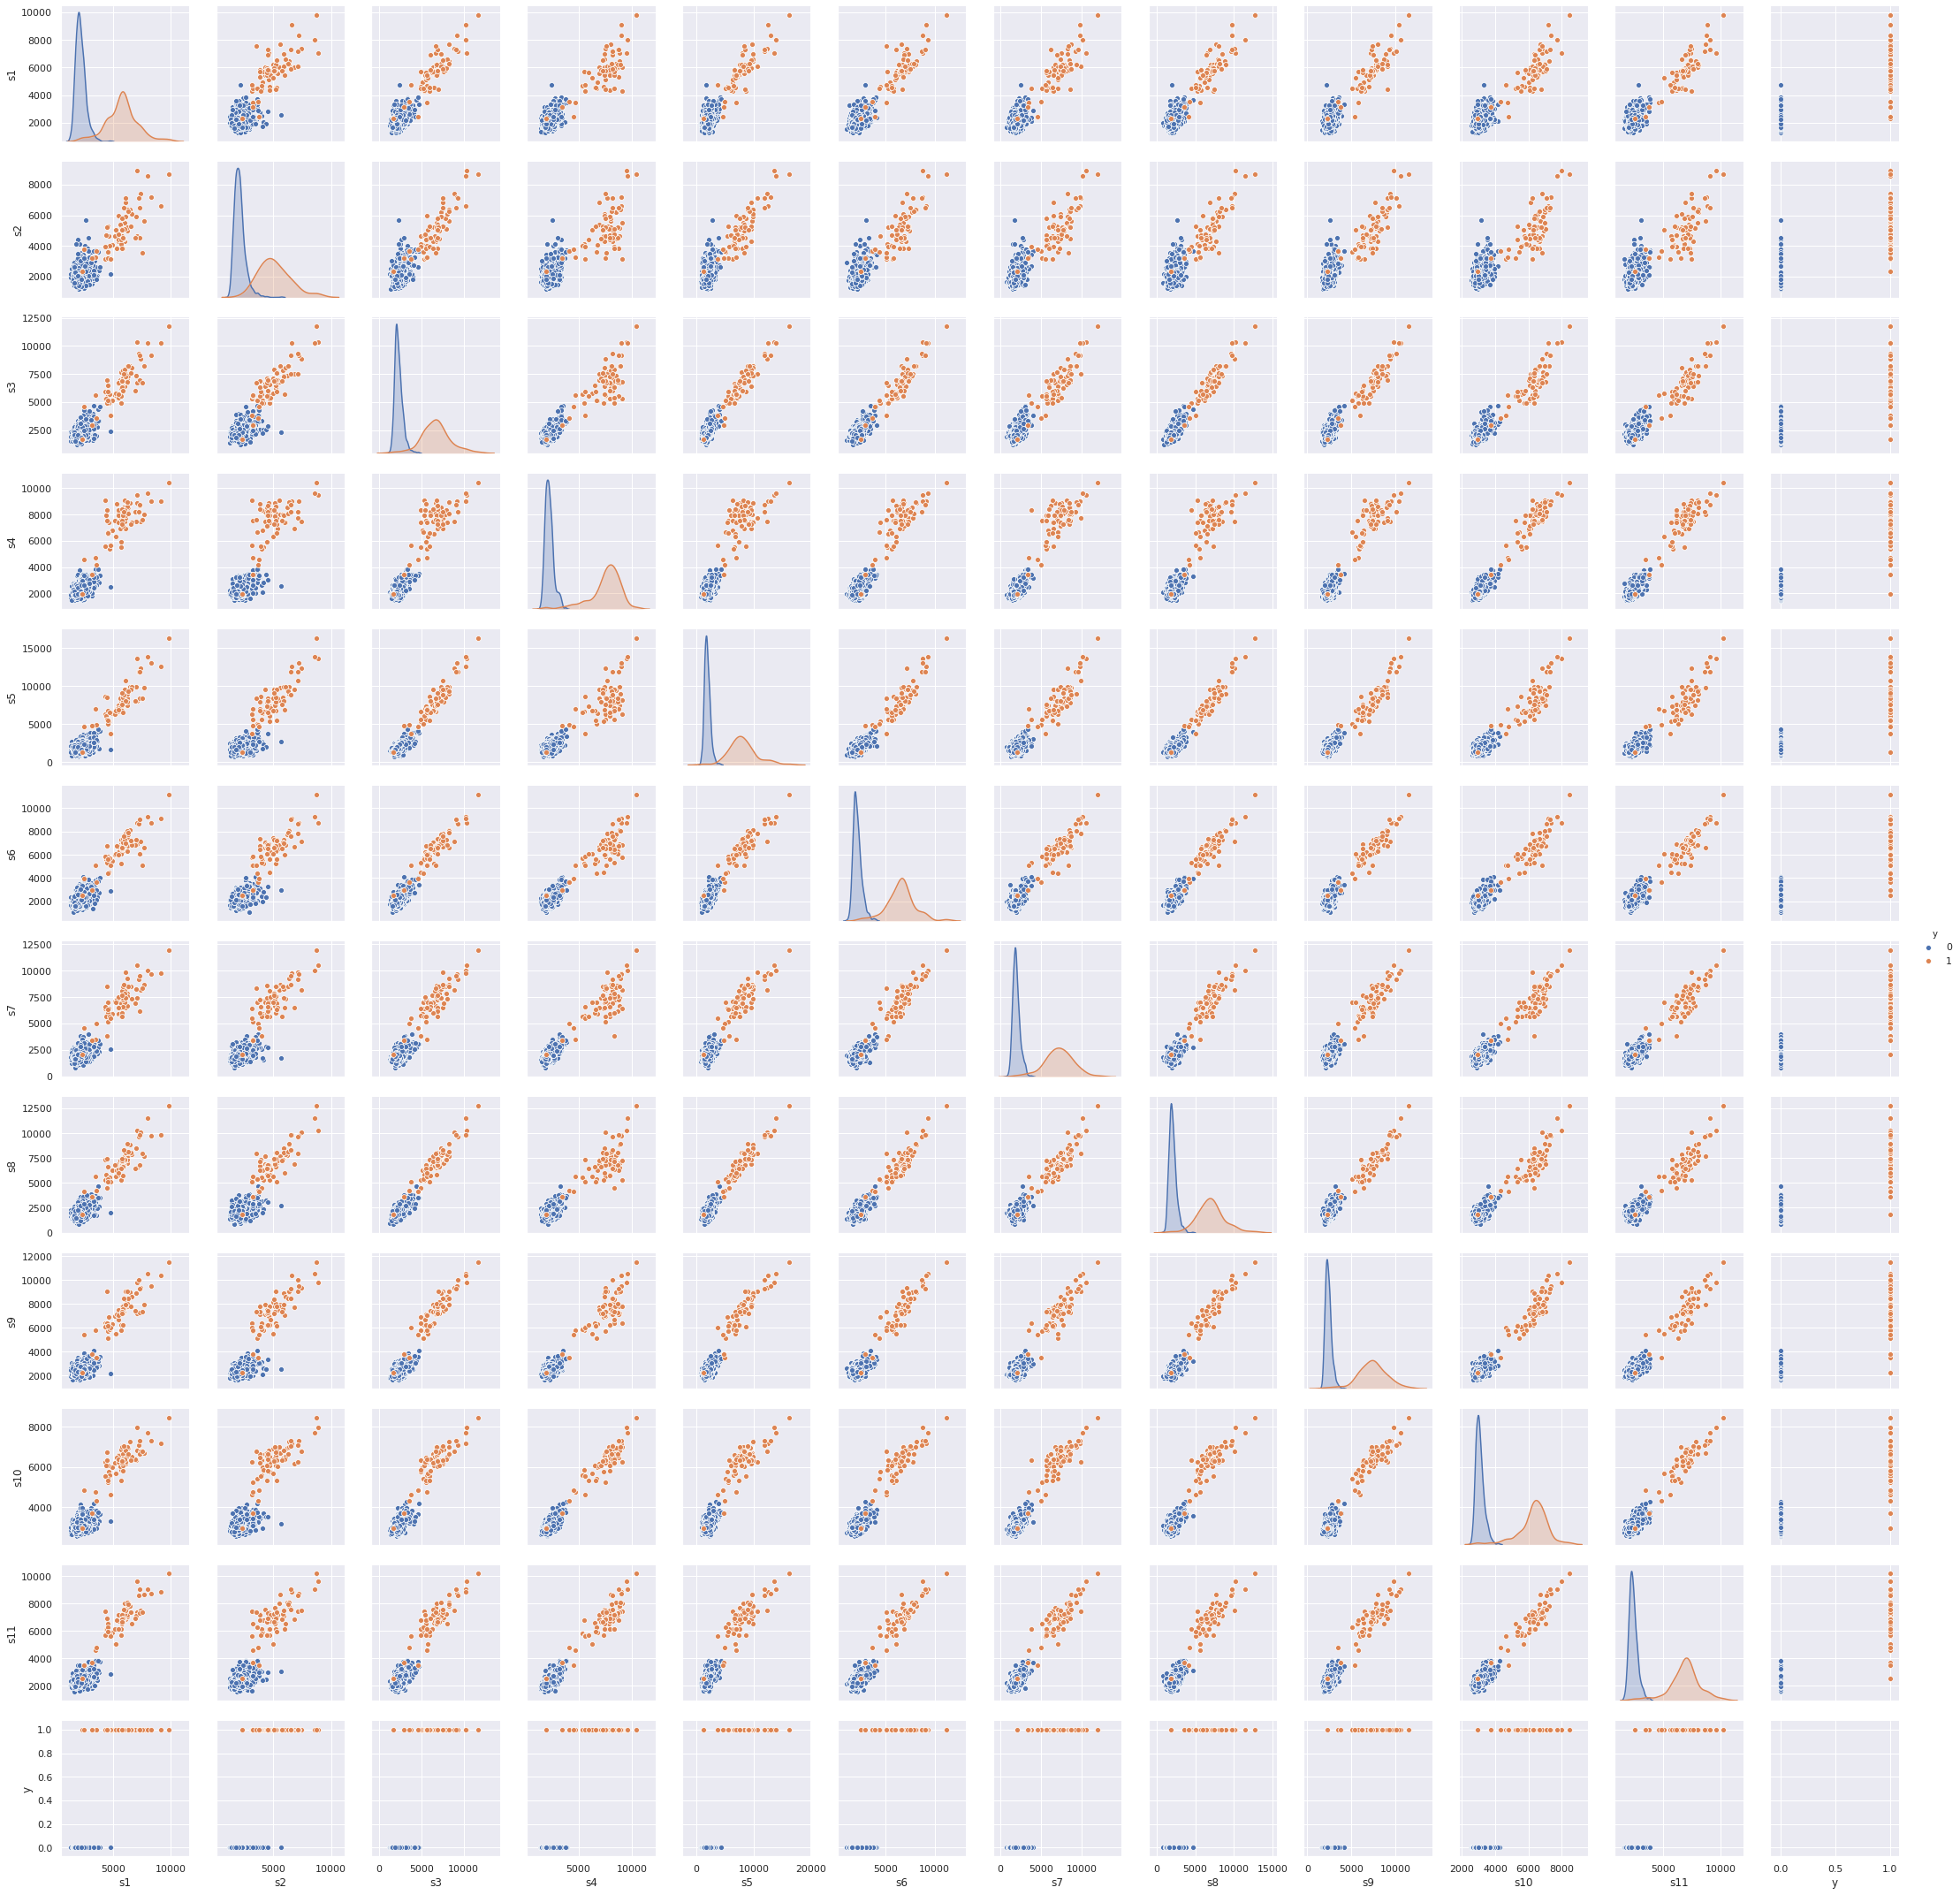

In [7]:
sns.pairplot(tmp3, hue='y')

We can observe these scoring data are more separable than previous ones.

### NB1 : 4 features with huge majority of zero

Thanks to the previous analysis, we have also observed that several features are composed of zero values.

In [14]:
zero_values = (X_train.iloc[:,:26] == 0).sum(axis=0)
categories = np.array(zero_values.index)

In [15]:
p = figure(x_range=categories, 
           plot_height=250, plot_width = 900, 
           title="Zero Count")

p.vbar(x=categories, top=zero_values, width=0.9)

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

We observe that 4 variables (q2, q3, q12, q13) contain a majority of zero. Focus on them...

In [16]:
colormap = {0: 'red', 1: 'blue'}
colors = [colormap[x] for x in y_train['y']]

p1 = figure(title='qs2',plot_width=500, plot_height=200)
p1.circle(range(1,y_train.shape[0]+1), X_train['qs2'].tolist(), color=colors, fill_alpha=0.2, size=10)
p2 = figure(title='qs3', plot_width=500, plot_height=200)
p2.circle(range(1,y_train.shape[0]+1), X_train['qs3'].tolist(), color=colors, fill_alpha=0.2, size=10)
p3 = figure(title='qs12', plot_width=500, plot_height=200)
p3.circle(range(1,y_train.shape[0]+1), X_train['qs12'].tolist(), color=colors, fill_alpha=0.2, size=10)
p4 = figure(title='qs13', plot_width=500, plot_height=200)
p4.circle(range(1,y_train.shape[0]+1), X_train['qs13'].tolist(), color=colors, fill_alpha=0.2, size=10)

grid = gridplot([[p1, p2], [p3, p4]], plot_width=450, plot_height=250)

show(grid)

We can observal a huge majority of zeros for the previous features. We have to use a penalty to limit the influence of these chaotic distribution and transform them (log, mean, median...)

# Recommandations
- use penalty to limit outliners influence
- use transformations (log, mean, median) to limit bad influence of outliners and chaotic distributions
- use tree classifier because it introduces more nun-linearity

# Notebook on colab - Algorithm

Our main issue is the size of the dataset. To improve computing performance and gain a lot of time, I have decided to work on google colab to have a gpu more efficient and more RAM. <br>
This is not a marginal point. Indeed, this point will be determined the algorithmes used. <br>
I've tested the following algorithmes (submission score) :
- logistic regression (only on scoring features : 0.80)
- random forest (no convergence)
- extrarRandom Forest (0.6)
- Bagging (0.7)
- SVM (just for testing and validate the surge of dimensionnality)
- Boosting method :
    - XGBOOST (best core : 0.87) with the following parameters :
        XGBClassifier(booster = 'gbtree', reg_lambda=3, eta = 0.001,
                    objective = 'binary:logistic', n_estimators=2500, max_depth=15,
                    verbose=True, n_jobs=-1, tree_method='gpu_hist', gpu_id=0,
                    random_state=1234, subsample=0.60)
    - LightGBOOST (score : 0.82)
    - Catboost (score : 0.84)
    - Stacking composed by ridge classifier and 3 xgboosts and a linear regression as final estimator (no resultat because of RAM size)

I don't have test DNN because I've some problems to implement it on colab.

# Conclusion


Thanks to this Datachallenge, I could test several algorithms and tune their hyper-parameters. *Nota bene* : I could not use grid search on colab because of RAM and timing limit. But thanks to data mining exploration, I had had good intuitions avoid nice scores and avoid overfitting.
At the end, I believe that stacking is second better method after DNN to solve this problem because it introduces many nun-linearity and it rewardes our dataset thanks to the concatenation of previous results.